#  <font color="darkred"> &#10070; Comparaison entre recherche simple et recherche par dichotomie</font>

## <font color="darkblue"> &diams; Recherche simple </font>

Un algorithme simple de **recherche d'un élément dans une liste** consiste à parcourir la liste depuis le premier élément. Si on rencontre l'élément recherché, on renvoie `True`, si on atteint la fin de la liste on renvoie `False`. La fonction Python ci-dessous (voir activité 1 du chapitre), implémente cet algorithme :


In [1]:
def recherche(element,liste):
    ''' Renvoie True si element est dans liste, False sinon '''
    for x in liste:
        # Si x est bien égal à élément renvoyer True sinon continuer le parcours
        if x==element: 
            return True
    # Si on atteint la ligne suivante on renvoie False puisqu'aucun élément n'est égal à celui recherché
    return False

## <font color=green> &#9998; Exercices </font>
1. <font color=green> <b>Exécuter</b> la cellule précédente </font>

2. <font color=green> <b>Proposer</b> un jeu de tests pour cette fonction</font><br>

In [7]:
# Tests de la fonction recherche
assert recherche(3,[1,3,5,10])==True
assert recherche(4,[1,3,5,10])==False
assert recherche(1,[1,3,5,10])==True
assert recherche(10,[1,3,5,10])==True

## <font color="darkblue"> &diams; Temps d'exécution de la recherche simple</font>

On souhaite mesure le temps d'exécution de notre fonction lorsque la taille de la liste augmente, on utilise le module `time` de Python.

### <font color='red'>&#9888;</font> Attention !
Ces mesures sont forcément imprécises car elles dépendent des demandes des autres applications s'executant sur l'ordinateur.

On donne ci-dessous La fonction `temps_execution(n)` qui renvoie pour une liste de longueur `n` le temps d'exécution de la fonction `recherche` ci-dessus.

In [8]:
import time

def temps_execution(n):
    # On crée la liste des n premiers entiers
    liste = [i for i in range(0,n)]
    # On y recherche -1 (qui n'y est pas !) en mesurant le temps d'exécution
    debut = time.time()
    recherche(-1,liste)
    fin = time.time()
    return fin-debut

Pour obtenir une **estimation** du temps d'exécution de l'algorithme de recherche sur une liste de 10000 éléments, il suffit d'écrire :

In [9]:
temps_execution(10000)

0.00020051002502441406

## <font color=green> &#9998; Exercices </font>
3. <font color=green> Quel est le temps d'exécution pour une liste de 100000 éléments ?</font>

In [11]:
# Votre réponse ici
temps_execution(100000)

0.0024785995483398438

4. <font color=green> Construire par la méthode de votre choix, une liste `x` contenant les valeurs suivantes : <code>[100000,200000,300000,...,20000000]</code> (les multiples de 100000 jusqu'à deux millions)</font>

In [12]:
# Votre réponse ici (penser à utiliser une liste définie par compréhension)
x = [100000*k for k in range(1,21)]

5. <font color='green'>Construire une liste <code>y</code> contenant les temps d'exécution pour les valeurs de longeur de liste prise dans la liste <code>x</code> construite ci-dessus</font>.

In [19]:
# Votre réponse ici
y = [temps_execution(l) for l in x]

On utilise maintenant la bibliothèque `matplotlib` afin de tracer le graphique des temps d'exécution (valeurs de la liste `y`) en fonction de la longueur de la liste (valeurs de la liste `x`) :

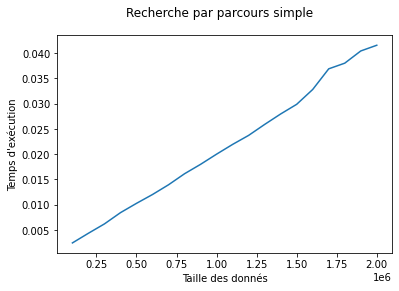

In [14]:
# Allure du graphique avec matplotlib
import matplotlib.pyplot as plt
plt.xlabel("Taille des donnés")
plt.ylabel("Temps d'exécution")
plt.suptitle("Recherche par parcours simple")
plt.plot(x, y)

## <font color=green> &#9998; Exercices </font>
6. <font color=green> Quel est l'allure du graphique obtenu ? </font>

C'est une droite

7. <font color=green> Quelle est la relation entre la longueur de la liste et le temps d'exécution ? </font>

C'est une relation de proportionnalité


8. <font color=green> Sur un ordinateur <code>temps_execution(10000000)</code> renvoie <b>0,2</b> secondes. Pouvez vous prédire la valeur de  <code>temps_execution(100000000)</code> sur ce même ordinateur ? Justifier.</font>

La longueur de la liste est multipliée par 10, comme il y a proportionnalité entre longueur de la liste et temps d'exécution, le temps d'exécution sera aussi multiplié par 10 et sera donc environ de **2** secondes.


## <font color="darkblue"> &diams; Recherche dichotomique</font>

On donne ci-dessous, la fonction python `recherche_dichotomie` vue dans l'activité 2 du chapitre. On rappelle que cette méthode de recherche **ne fonctionne que si la liste est triée**

In [15]:
def recherche_dichotomie(element,liste):
    debut = 0
    fin = len(liste)-1
    while fin-debut>0:
        milieu = (debut+fin)//2
        if element>liste[milieu]:
            debut=milieu+1
        else:
            fin=milieu
    if element==liste[debut]:
        return True
    else:
        return False

## <font color="darkblue"> &diams; Comparaison des temps d'exécution</font>

De la même façon que pour la recherche simple, on définit la fonction `temps_execution_dicho` afin de mesurer les temps d'exécution de cette fonction lorsque la taille de la liste augmente.

In [16]:
def temps_execution_dicho(n):
    # On crée la liste des n premiers entiers
    liste = [i for i in range(0,n)]
    # On y recherche -1 (qui n'y est pas !) en mesurant le temps d'exécution
    debut = time.time()
    recherche_dichotomie(-1,liste)
    fin = time.time()
    return fin-debut

## <font color=green> &#9998; Exercices </font>
9. <font color='green'>Construire une liste <code>y_dicho</code> contenant les temps d'exécution de la recherche par dichotomie pour les valeurs de longeur de liste prises dans la liste <code>x</code></font>.

In [20]:
# Votre réponse ici
y_dicho = [temps_execution_dicho(l) for l in x]

On peut maintenant tracer sur le même graphique, les temps d'exécution de la recherche simple et de la recherche dichotomique.

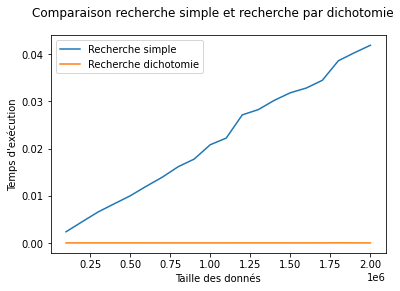

In [35]:
# Allure du graphique avec matplotlib
import matplotlib.pyplot as plt
plt.xlabel("Taille des donnés")
plt.ylabel("Temps d'exécution")
plt.suptitle("Comparaison recherche simple et recherche par dichotomie")
g1 = plt.plot(x, y,label="Recherche simple")
g2 = plt.plot(x,y_dicho,label="Recherche dichotomie")
plt.legend()